In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from webweb import Web

import re

In [2]:
# keep this table growing for overlapping names so that we can simplify it
club_name_mappings = {
    'man': 'manchester', 
    'man city': 'manchester city', 
    'leicester': 'leicester city', 
    'sheff': 'sheffield', 
    'west brom': 'west bromwich albion', 
    'wolves': 'wolverhampton wanderers'
}

# exclusions for club names
name_exclusions = [
    'united', 'utd.', ' utd',
    ' fc', 'fc ', 
    'club ', ' club'
]

# re for extracting under age from name
u_age_re = re.compile(r'[uU][1-9]+')

# function to clean name
def name_cleaner(name: str) -> str:
    name = name.lower()
    
    # first look for re
    for substr in u_age_re.findall(name):
        name = name.replace(substr, '')
    
    # now look through the others
    for substr in name_exclusions:
        if substr in name:
            name = name.replace(substr, '')
            
    # remove left and right white space
    stripped_name = name.strip()
    
    # finally, if the team has a mapping, look for the mapping
    if stripped_name in club_name_mappings:
        stripped_name = club_name_mappings[stripped_name]
        
    return stripped_name


In [3]:
df = pd.read_csv('data/2020/english_premier_league.csv')

In [4]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Arsenal FC,Thomas,27,Defensive Midfield,Atlético Madrid,£45.00m,in,Summer,45.00,Premier League,2020,2020/2021
1,Arsenal FC,Gabriel,22,Centre-Back,LOSC Lille,£23.40m,in,Summer,23.40,Premier League,2020,2020/2021
2,Arsenal FC,Pablo Marí,26,Centre-Back,Flamengo,£7.20m,in,Summer,7.20,Premier League,2020,2020/2021
3,Arsenal FC,Rúnar Alex Rúnarsson,25,Goalkeeper,Dijon,£1.80m,in,Summer,1.80,Premier League,2020,2020/2021
4,Arsenal FC,Cédric Soares,28,Right-Back,Southampton,Free transfer,in,Summer,0.00,Premier League,2020,2020/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
560,West Ham United,Josh Cullen,24,Central Midfield,RSC Anderlecht,£450Th.,out,Winter,0.45,Premier League,2020,2020/2021
561,West Ham United,Felipe Anderson,27,Left Winger,FC Porto,Loan,out,Winter,0.00,Premier League,2020,2020/2021
562,West Ham United,Jack Wilshere,28,Central Midfield,Without Club,-,out,Winter,0.00,Premier League,2020,2020/2021
563,Wolverhampton Wanderers,Rayan Aït Nouri,19,Left-Back,SCO Angers,Loan,in,Winter,0.00,Premier League,2020,2020/2021


In [5]:
clubs = set(list(df['club_name'].unique()) + list(df['club_involved_name'].unique()))

In [6]:
clubs

{'1.FSV Mainz 05',
 'AC Milan',
 'ADO Den Haag',
 'AS Roma',
 'Aberdeen FC',
 'Accrington',
 'Ajax',
 'Alavés',
 'Amiens SC',
 'Arsenal',
 'Arsenal FC',
 'Arsenal U23',
 'Aston Villa',
 'Atalanta',
 'Atlético Madrid',
 'Atlético-MG',
 'Bay. Leverkusen',
 'Bayern Munich',
 'Beerschot V.A.',
 'Benfica',
 'Besiktas',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Brighton & Hove Albion',
 'Brighton U23',
 'Brisbane Roar',
 'Bristol City',
 'Burnley',
 'Burnley FC',
 'Burnley U23',
 'CA Talleres',
 'CD Leganés',
 'Cardiff',
 'Carlisle United',
 'Celtic',
 'Charlton',
 'Chelsea',
 'Chelsea FC',
 'Chelsea U23',
 'Club Brugge',
 'Coritiba FC',
 'Cosenza',
 'Coventry',
 'Crystal Palace',
 'Cukaricki',
 'Derby',
 'Dijon',
 'Dinamo Bucarest',
 'Dynamo Kyiv',
 'E. Frankfurt',
 'Elche CF',
 'Estudiantes',
 'Everton',
 'Everton FC',
 'Everton U23',
 'F. Düsseldorf',
 'FC Augsburg',
 'FC Barcelona',
 'FC Groningen',
 'FC Lorient',
 'FC Porto',
 'FC Schalke 04

In [7]:
# create a mapping from the club names in the table to our standardized club names
table_to_standard = {club: name_cleaner(club) for club in clubs}

In [8]:
table_to_standard

{'SCO Angers': 'sco angers',
 'Chelsea': 'chelsea',
 'Burnley U23': 'burnley',
 'Coventry': 'coventry',
 'Mouscron': 'mouscron',
 'Liverpool FC': 'liverpool',
 'Rangers': 'rangers',
 'Wolverhampton Wanderers': 'wolverhampton wanderers',
 'Norwich': 'norwich',
 'Vitesse': 'vitesse',
 'Heerenveen': 'heerenveen',
 'Tottenham Hotspur': 'tottenham hotspur',
 'West Ham United': 'west ham',
 'NK Maribor': 'nk maribor',
 'CD Leganés': 'cd leganés',
 'Peñarol': 'peñarol',
 'Lazio': 'lazio',
 'Lausanne-Sport': 'lausanne-sport',
 'Marseille B': 'marseille b',
 'Brighton U23': 'brighton',
 'Real Madrid': 'real madrid',
 'Fenerbahce': 'fenerbahce',
 'Fiorentina': 'fiorentina',
 'Southampton': 'southampton',
 'SH SIPG': 'sh sipg',
 'Bayern Munich': 'bayern munich',
 'Estudiantes': 'estudiantes',
 'Kansas': 'kansas',
 'Luton': 'luton',
 'Leeds': 'leeds',
 'Benfica': 'benfica',
 'Sporting CP': 'sporting cp',
 'Retired': 'retired',
 'Elche CF': 'elche cf',
 'Trabzonspor': 'trabzonspor',
 'Brentford': '

In [9]:
G = nx.DiGraph()
# G.add_nodes_from(clubs)

for idx, row in df.iterrows():
    # get the standardized names
    club_name = table_to_standard[row['club_name']]
    club_involved = table_to_standard[row['club_involved_name']]
    
    
    if row['transfer_movement'] == 'in':
        # get the clean name 
        G.add_edge(club_involved, club_name)
        
    elif row['transfer_movement'] == 'out':
        G.add_edge(club_name, club_involved)

# G.edges

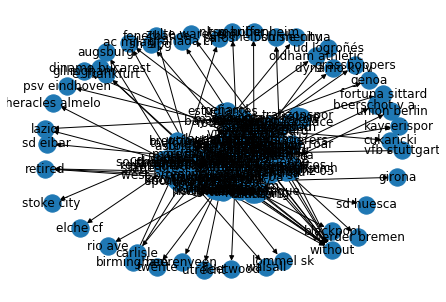

In [10]:
nx.draw(G, with_labels=True)

In [11]:
w = Web(nx_G=G)
w.show()

In [30]:
len(G.edges)

449